<a href="https://colab.research.google.com/github/val93s/Machine_learning/blob/main/Copy_of_11_12_1_Activity.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Activity 11.12.1

How many of us decide where to eat or what product to buy based on consumer reviews?  This is a very important source of information to both businesses and consumers.  However, there are way too many reviews being generated for humans to read and classify all of them.  Enter machine learning and natural language processing.

In later lessons, we will ask the questions, "Given the words in the review, how likely is it that this review is positive?  And how likely is it that the review is negative?".  We will use these probabilities to determine if we think the review is positive or negative.  

What words are most common in positive and negative reviews?  In this activity, you will convert the text of Yelp reviews into a numerical representation (vectorization) and then create a word cloud from the positive and negative reviews.

##Step 1: Install the necessary packages

```
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
!pip install wordcloud
import wordcloud
```

In [ ]:
#Step 1
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.feature_extraction.text import CountVectorizer
!pip install wordcloud
import wordcloud



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


##Step 2: Download and save the `yelp_labeled.txt` data set from the class resources  

Make a note of where you saved the file on your computer.

##Step 3: Upload the `yelp_labeled.txt` running the following code block 

When prompted, navigate to and select the `yelp_labeled.txt` data set where you saved it on your computer.

In [ ]:
#Step 3

from google.colab import files
yelp_labeled = files.upload()

Saving yelp_labeled (1).txt to yelp_labeled (1) (1).txt


## Step 4: Create a Pandas Dataframe from the `.txt` file
* Run the following code block to create a Pandas DataFrame from the `.txt` file and name it `Yelp`.
* The sentiment of the reviews is coded as `0` and `1`.  By looking at the first 5 reviews, does `Sentiment = 1` correspond to a negative review or a positive review?

In [ ]:
#Step 4

Yelp = pd.read_csv('yelp_labeled.txt',delimiter='\t',header=None)
Yelp.rename(columns={0:'Review',1:'Sentiment'}, inplace=True)
print(Yelp.head())

                                              Review  Sentiment
0                           Wow... Loved this place.          1
1                                 Crust is not good.          0
2          Not tasty and the texture was just nasty.          0
3  Stopped by during the late May bank holiday of...          1
4  The selection on the menu was great and so wer...          1


###Answer:



##Step 5: Instantiate and fit the `CountVectorizer` from Sklearn to the text of the reviews
* This can be done by running the following code:

```
model = CountVectorizer()
model.fit(Yelp['Review'])
```
* `CountVectorizer` takes all the words in all of the reviews and assigns each one a unique integer.

In [ ]:
#Step 5
model = CountVectorizer()
model.fit(Yelp['Review'])


CountVectorizer()

##Step 6: Print the model vocabulary
* Run the following code block to print all the unique words in the reviews along with their corresponding integers.
* What integer corresponds to the word *wow*?


In [ ]:
#Step 6

print(model.vocabulary_)

{'wow': 2012, 'loved': 1046, 'this': 1798, 'place': 1330, 'crust': 427, 'is': 943, 'not': 1195, 'good': 764, 'tasty': 1761, 'and': 64, 'the': 1780, 'texture': 1774, 'was': 1940, 'just': 967, 'nasty': 1169, 'stopped': 1699, 'by': 264, 'during': 557, 'late': 991, 'may': 1087, 'bank': 139, 'holiday': 867, 'off': 1208, 'rick': 1488, 'steve': 1691, 'recommendation': 1444, 'it': 945, 'selection': 1560, 'on': 1221, 'menu': 1110, 'great': 778, 'so': 1630, 'were': 1965, 'prices': 1374, 'now': 1198, 'am': 57, 'getting': 746, 'angry': 66, 'want': 1934, 'my': 1162, 'damn': 439, 'pho': 1316, 'honeslty': 870, 'didn': 484, 'taste': 1757, 'that': 1778, 'fresh': 713, 'potatoes': 1362, 'like': 1016, 'rubber': 1505, 'you': 2027, 'could': 396, 'tell': 1766, 'they': 1788, 'had': 805, 'been': 167, 'made': 1061, 'up': 1883, 'ahead': 44, 'of': 1207, 'time': 1809, 'being': 173, 'kept': 969, 'under': 1866, 'warmer': 1938, 'fries': 719, 'too': 1824, 'touch': 1833, 'service': 1573, 'very': 1911, 'prompt': 1386, '

###Answer:



##Step 7: Create a DataFrame containing only positive reviews
* Name the DataFrame `Positive`.
* There are several ways to do this.  One example is the following:

```
Positive = Yelp['Review'].loc[Yelp['Sentiment']==1]
```
* Print the first 5 rows of `Positive`.  What is the text of the first positive review?

In [ ]:
#Step 7:
Positive = Yelp['Review'].loc[Yelp['Sentiment']==1]
Positive.head(5)


0                             Wow... Loved this place.
3    Stopped by during the late May bank holiday of...
4    The selection on the menu was great and so wer...
8                            The fries were great too.
9                                       A great touch.
Name: Review, dtype: object

###Answer:



##Step 8: Create a DataFrame containing only negative reviews
* Name the DataFrame `Negative`.
* Use the code you wrote in Step 7 as an example.
* Print the first 5 rows of `Negative`.  What is the text of the first negative review?

In [ ]:
#Step 8:
Negative =Yelp['Review'].loc[Yelp['Sentiment']==0]
Negative.head()



1                                   Crust is not good.
2            Not tasty and the texture was just nasty.
5       Now I am getting angry and I want my damn pho.
6                Honeslty it didn't taste THAT fresh.)
7    The potatoes were like rubber and you could te...
Name: Review, dtype: object

###Answer:



##Step 9: Structure the data to make the word clouds
* Run the following code block to create `Positive_blob` and `Negative_blob`, which are each a very long string containing all of the text of all of the positive and negative reviews, respectively.
* This is the way the data must be structured to make the word clouds.

In [ ]:
#Step 9:

Positive_blob = ''
for i in Positive:
  Positive_blob += i

Negative_blob = ''
for i in Negative:
  Negative_blob += i



##Step 10: Print the word cloud of positive reviews
* Run the following code block to print the word cloud of positive reviews.
* Which words are most common in positive Yelp reviews? (They show up the largest in the word cloud.)

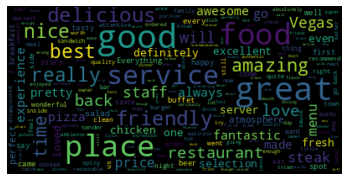

In [ ]:
#Step 10

word_cloud = wordcloud.WordCloud(max_font_size=40).generate(Positive_blob)
plt.figure()
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

###Answer:



##Step 11: Print the word cloud of negative reviews
* Run the following code block to print the word cloud of negative reviews.
* Which words are most common in negative Yelp reviews? (They show up the largest in the word cloud.)

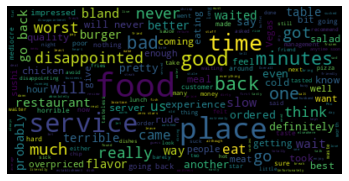

In [ ]:
#Step 11

word_cloud = wordcloud.WordCloud(max_font_size=40).generate(Negative_blob)
plt.figure()
plt.imshow(word_cloud, interpolation="bilinear")
plt.axis("off")
plt.show()

###Answer:

